<a href="https://colab.research.google.com/github/Rizkiyatul/Studi_Independen/blob/main/KELOMPOK_2_(GROCERIES_(MBA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Market Basket Analysis**
Market basket analysis adalah suatu metodologi untuk melakukan analisis buying habit konsumen dengan menemukan asosiasi antar beberapa item yang berbeda, yang diletakkan konsumen dalam shopping basket (keranjang belanja) yang dibeli pada suatu transaksi tertentu. Tujuan dari market basket analysis adalah untuk mengetahui produk-produk mana yang mungkin akan dibeli secara bersamaan

# **Groceries Market Basket Analysis**

## **1. Import Library**
Pertama-tama mengimpor library yang akan kita gunakan untuk analisis eksplorasi data dan visualisasi data.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **2. Import Dataset**
Kita akan menggunakan data Groceries_dataset.csv yang bisa temen-temen download [disini](https://drive.google.com/file/d/1UVn3De2OClYbTkTObZ7TpiskipdNR_c4/view?usp=sharing)

Sekarang import data ke DataFrame dengan library pandas.

In [ ]:
df = pd.read_csv('/content/Groceries_dataset.csv')
df

,Member_number,Date,Transaction,itemDescription
0,1808,21/07/2015,1,tropical fruit
1,2552,05/01/2015,2,whole milk
2,2300,19/09/2015,2,pip fruit
3,1187,12/12/2015,3,other vegetables
4,3037,01/02/2015,3,whole milk
...,...,...,...,...
19995,1721,15/10/2015,9111,whole milk
19996,2877,10/04/2015,9112,waffles
19997,3848,11/10/2015,9112,frozen vegetables
19998,4344,01/03/2015,9113,long life bakery product


Dari tabel diatas, menunjukkan jumlah data pada dataset terdapat 20000 baris dan 4 kolom

## **3. Data Preparation**
Pada tahapan ini kita akan memastikan tipe data yang digunakan sesuai, tidak ada nilai kosong 

In [ ]:
# cek tipe data dari setiap kolom
print('Dataset Information: \n')
print(df.info())

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    20000 non-null  int64 
 1   Date             20000 non-null  object
 2   Transaction      20000 non-null  int64 
 3   itemDescription  20000 non-null  object
dtypes: int64(2), object(2)
memory usage: 625.1+ KB
None


In [ ]:
# mencetak 10 data pertama
print('First Ten Rows of the DataFrame: \n')
print(df.head(10))

First Ten Rows of the DataFrame: 

   Member_number        Date  Transaction   itemDescription
0           1808  21/07/2015            1    tropical fruit
1           2552  05/01/2015            2        whole milk
2           2300  19/09/2015            2         pip fruit
3           1187  12/12/2015            3  other vegetables
4           3037  01/02/2015            3        whole milk
5           4941  14/02/2015            3        rolls/buns
6           4501  08/05/2015            4  other vegetables
7           3803  23/12/2015            5        pot plants
8           2762  20/03/2015            5        whole milk
9           4119  12/02/2015            5    tropical fruit


In [ ]:
#Mencetak data item yang unik (memiliki nilai item berbeda)
print('Unique Items: ', df['itemDescription'].nunique())
print( '\n', df['itemDescription'].unique())

Unique Items:  163

 ['tropical fruit' 'whole milk' 'pip fruit' 'other vegetables' 'rolls/buns'
 'pot plants' 'citrus fruit' 'beef' 'frankfurter' 'chicken' 'butter'
 'fruit/vegetable juice' 'packaged fruit/vegetables' 'chocolate'
 'specialty bar' 'butter milk' 'bottled water' 'yogurt' 'sausage'
 'brown bread' 'hamburger meat' 'root vegetables' 'pork' 'pastry'
 'canned beer' 'berries' 'coffee' 'misc. beverages' 'ham' 'turkey'
 'curd cheese' 'red/blush wine' 'frozen potato products' 'flour' 'sugar'
 'frozen meals' 'herbs' 'soda' 'detergent' 'grapes' 'processed cheese'
 'fish' 'sparkling wine' 'newspapers' 'curd' 'pasta' 'popcorn'
 'finished products' 'beverages' 'bottled beer' 'dessert' 'dog food'
 'specialty chocolate' 'condensed milk' 'cleaner' 'white wine' 'meat'
 'ice cream' 'hard cheese' 'cream cheese ' 'liquor' 'pickled vegetables'
 'liquor (appetizer)' 'UHT-milk' 'candy' 'onions' 'hair spray'
 'photo/film' 'domestic eggs' 'margarine' 'shopping bags' 'salt' 'oil'
 'whipped/sour cre

In [ ]:
# Cek missing value dan zeros
print(df.isnull().sum().sort_values(ascending=False))

Member_number      0
Date               0
Transaction        0
itemDescription    0
dtype: int64


Terlihat bahwa pada dataset tidak terdapat missing value dan zeros

In [ ]:
# cek nilai "NONE" pada kolom Item
print(df[df['itemDescription']=='NONE'])

Empty DataFrame
Columns: [Member_number, Date, Transaction, itemDescription]
Index: []


In [ ]:
# menghapus baris dengan nilai Item = None
df.drop(df[df['itemDescription']=='NONE'].index, inplace=True)

In [ ]:
# cek perubahan yang terjadi
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    20000 non-null  int64 
 1   Date             20000 non-null  object
 2   Transaction      20000 non-null  int64 
 3   itemDescription  20000 non-null  object
dtypes: int64(2), object(2)
memory usage: 781.2+ KB
None


## **4. Visualisasi dan Memahami Data**
Kita tahu bahwa dataset ini direkam dari 01/01/2014 hingga 30/12/2015. Sebelum kita masuk dalam pemodelan, kita harus mengeksplorasi dan memvisualisasikan penjualan dalam periode waktu ini. Barang apa yang paling banyak dibeli pelanggan? Bulan mana yang lebih sukses? Mari kita jawab ini secara visual.


In [ ]:
# Mencetak 20 data penjualan item terbanyak
most_sold = df['itemDescription'].value_counts().head(20)

print('Most Sold Items: \n')
print(most_sold)

Most Sold Items: 

whole milk          1607
other vegetables    1186
sausage              924
tropical fruit       898
rolls/buns           843
root vegetables      749
citrus fruit         736
soda                 672
yogurt               596
frankfurter          580
pip fruit            574
pork                 531
beef                 475
canned beer          456
chicken              406
bottled water        385
bottled beer         348
pastry               315
hamburger meat       293
ham                  252
Name: itemDescription, dtype: int64


In [ ]:
transaction_count = df.groupby(by='itemDescription')[['Transaction']].count().sort_values(by='Transaction', ascending=False)
def convert_to_percentage(x):
    return 100 * x / float(x.sum())

transaction_percentage = transaction_count.apply(convert_to_percentage)
transaction_percentage.head()

,Transaction
itemDescription,
whole milk,8.035
other vegetables,5.930
sausage,4.620
tropical fruit,4.490
rolls/buns,4.215


Text(0.5, 1.0, 'Items Most Sold')

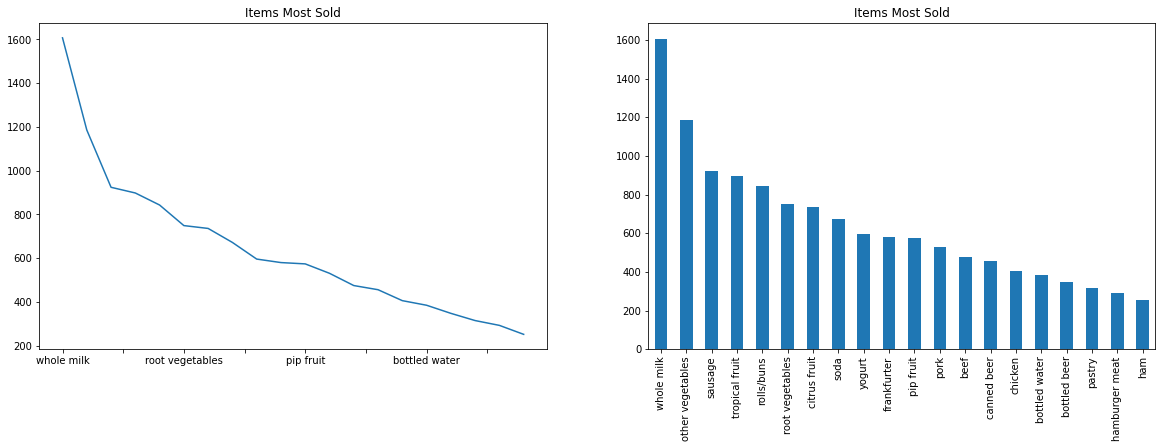

In [ ]:
# visualisasikan data penjualan item terbanyak ke line chart dan bar chart
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
#plt.plot(most_sold)
most_sold.plot(kind='line')
plt.title('Items Most Sold')


plt.subplot(1,2,2)
most_sold.plot(kind='bar')
plt.title('Items Most Sold')

## **5. Market Basket Analysis**

Pertama kita mengubah item list menjadi data transaksi dengan menggunakan TransactionEncoder.
Kita akan menggunakan frequent item-sets untuk menghasilkan aturan asosiasi dengan menggunakan algoritma Apriori.


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

kita membuat list transaction_list() yang unik sehingga kita dapat mengubah data kita ke dalam format yang benar 

In [ ]:
transaction_list = []

# For loop to create a list of the unique transactions throughout the dataset:
for i in df['Transaction'].unique():
    tlist = list(set(df[df['Transaction']==i]['itemDescription']))
    if len(tlist)>0:
        transaction_list.append(tlist)
print(len(transaction_list))

8976


kita menggunakan TransactionEncoder untuk merubah bentuk transaction_list()

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df2 = pd.DataFrame(te_ary, columns=te.columns_)

Sekarang kita terapkan Apriori. Kita akan menggunakan parameter min_threshold (nilai ambang batas yang ditentukan) dalam aturan asosiasi untuk metrik lift menjadi 1,0 karena jika kurang dari satu, maka kedua item tersebut kemungkinan tidak akan dibeli bersama. Kita akan mengurutkan nilai berdasarkan keyakinan untuk melihat kemungkinan suatu barang dibeli jika pendahulunya dibeli.

In [ ]:
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
metrix = pd.DataFrame(rules)
metrix[['antecedents','consequents', 'support', 'confidence', 'lift']].sort_values('lift', ascending=False)

,antecedents,consequents,support,confidence,lift
0,(whole milk),(rolls/buns),0.014483,0.088737,1.001893
1,(rolls/buns),(whole milk),0.014483,0.163522,1.001893


# **Kesimpulan**

Dapat dilihat dari analisis diatas, di mana semakin tinggi nilai peningkatan, semakin kuat korelasi antar item. Data dengan jelas menunjukkan bahwa whole milk adalah konsekuensi populer, yang masuk akal karena itu adalah groceries. Selain whole milk, mari kita lihat korelasi item yang lebih menarik 
(format: antecedant(s) -> consequent):


> Kue Kering -> Roti

> Kue -> Teh

> (Kopi + Teh) -> Kue

> Sandwhich -> Teh

> Cokelat Panas -> Kue


Bisnis selalu mencari cara untuk mengoptimalkan pengaturan mereka dan meningkatkan penjualan mereka. Toko roti tidak berbeda, dan analisis semacam ini bisa dilakukan untuk semua jenis toko ritel atau pasar juga. Karena kita sekarang mengetahui korelasi antara item dan kepentingan bersama pelanggan, bisnis dapat membuat keputusan berdasarkan temuan ini. Misalnya, toko roti ini mungkin ingin meletakkan roti yang baru dipanggang di dekat kue kering mereka, karena pelanggan yang membeli kue kering tampaknya juga tertarik dengan roti. Selain penempatan produk, toko roti mungkin juga tertarik untuk mengadakan promosi item gratis, mengingat kemungkinan besar item lain dijual sebagai hasilnya (Misalnya, jika mereka memberikan beberapa roti panggang spesial gratis, itu mungkin tidak hanya menarik pelanggan baru yang sering datang, tetapi juga ada peluang yang sangat bagus bahwa pelanggan masih akan menghabiskan uang untuk kopi).

